In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
import math
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
collisions = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [3]:
causes = collisions[collisions.columns[18:23]]

In [4]:
causes = causes.apply(pd.Series.value_counts)

In [5]:
causes['CONTRIBUTING FACTOR VEHICLE 1'] = causes['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 2'] = causes['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 3'] = causes['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 4'] = causes['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 5'] = causes['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='NaN', value=0)
causes = (causes['CONTRIBUTING FACTOR VEHICLE 1'] + causes['CONTRIBUTING FACTOR VEHICLE 2'] + 
                 causes['CONTRIBUTING FACTOR VEHICLE 3'] + causes['CONTRIBUTING FACTOR VEHICLE 4'] + 
                 causes['CONTRIBUTING FACTOR VEHICLE 5'])

In [6]:
causes

Aggressive Driving/Road Rage                                84.0
Alcohol Involvement                                        149.0
Animals Action                                               2.0
Backing Unsafely                                           190.0
Brakes Defective                                            45.0
Cell Phone (hand-held)                                       7.0
Cell Phone (hands-free)                                      5.0
Driver Inattention/Distraction                            3971.0
Driver Inexperience                                        244.0
Drugs (Illegal)                                             21.0
Failure to Keep Right                                       19.0
Failure to Yield Right-of-Way                             1950.0
Fatigued/Drowsy                                            395.0
Fell Asleep                                                 21.0
Following Too Closely                                       66.0
Glare                    

In [7]:
causes = causes.drop(causes.index[42])

In [8]:
total = causes.sum()

In [9]:
top10 = (causes/total)*100

In [10]:
top10.sum()

100.00000000000001

In [11]:
top10 = top10.nlargest(10)

In [12]:
top10

Driver Inattention/Distraction                           27.972668
Passenger Distraction                                    15.602987
Failure to Yield Right-of-Way                            13.736264
Other Vehicular                                           7.417582
Physical Disability                                       4.874613
Lost Consciousness                                        4.177233
Fatigued/Drowsy                                           2.782474
Traffic Control Disregarded                               2.683855
Prescription Medication                                   2.458439
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     2.092139
dtype: float64

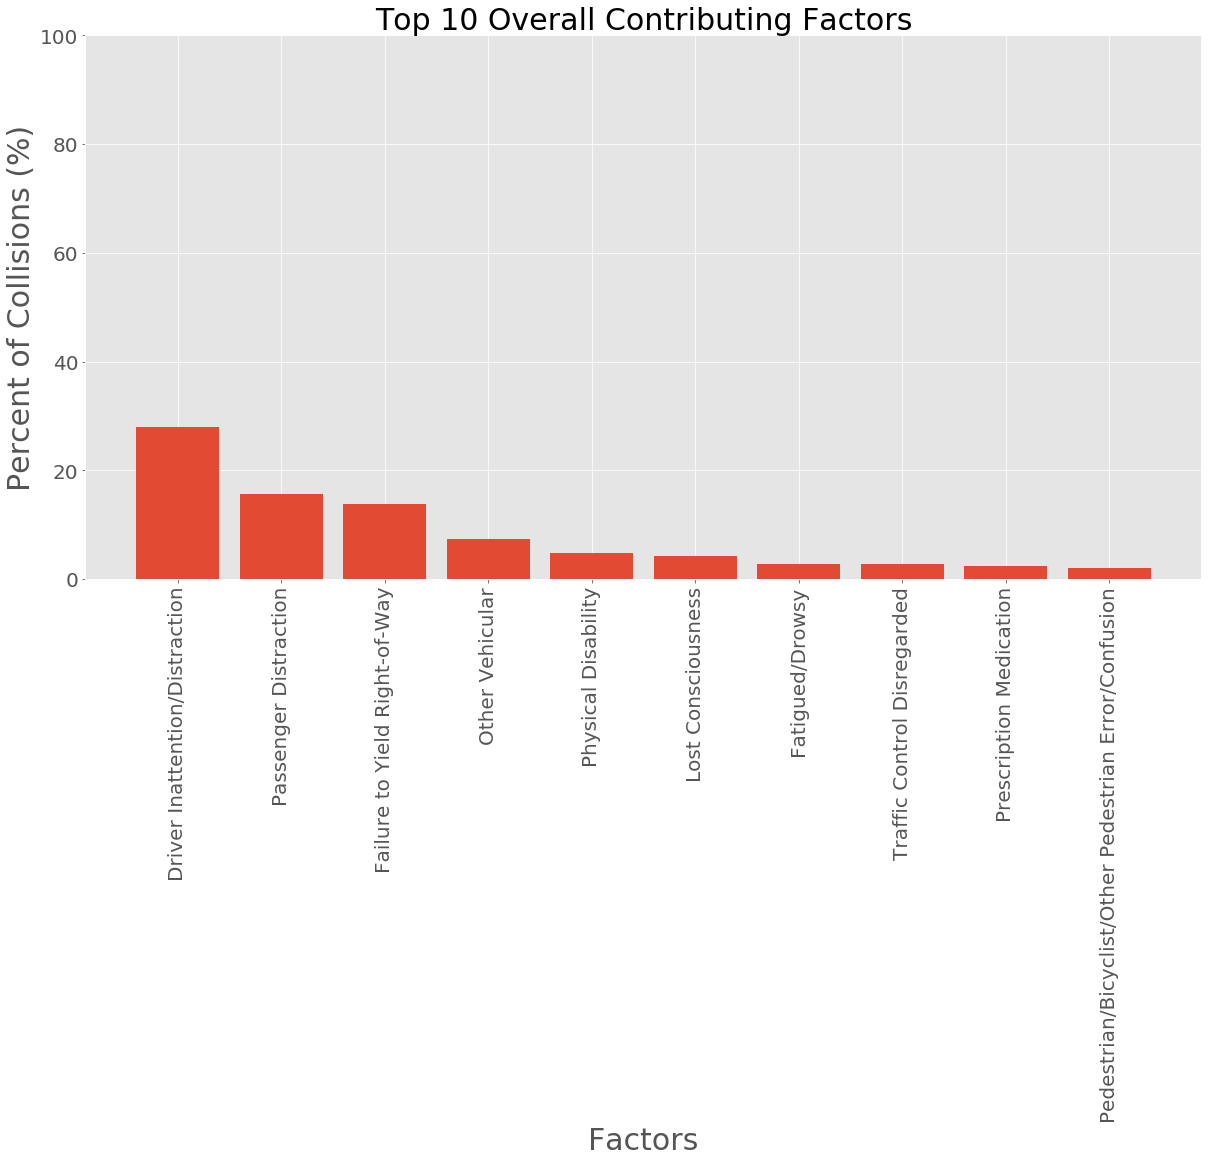

In [13]:
plt.bar(range(len(top10)), top10.values, align='center')
plt.tick_params(axis='y', labelsize=20)
plt.ylim([0,100])
plt.xticks(range(len(top10)), top10.index.values, fontsize=20 , rotation=90)
plt.title('Top 10 Overall Contributing Factors', size=30)
plt.xlabel('Factors', size=30)
plt.ylabel('Percent of Collisions (%)', size=30)
plt.show()

In [53]:
cars = collisions[((collisions['VEHICLE TYPE CODE 1'] != 'BICYCLE') & (collisions['VEHICLE TYPE CODE 1'].notnull())) | 
                          ((collisions['VEHICLE TYPE CODE 2'] != 'BICYCLE') & (collisions['VEHICLE TYPE CODE 2'].notnull())) | 
                          ((collisions['VEHICLE TYPE CODE 3'] != 'BICYCLE') & (collisions['VEHICLE TYPE CODE 3'].notnull())) | 
                          ((collisions['VEHICLE TYPE CODE 4'] != 'BICYCLE') & (collisions['VEHICLE TYPE CODE 4'].notnull())) | 
                          ((collisions['VEHICLE TYPE CODE 5'] != 'BICYCLE') & (collisions['VEHICLE TYPE CODE 5'].notnull()))]
safety_index_cars = cars['Collision Rate'].mean()
if math.isnan(safety_index_cars):
    safety_index_cars = 0
safety_index_cars

0.4289544631438959

In [54]:
len(cars)

20597

In [17]:
bikes = collisions[((collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') & ((collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE')) |
                   (collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') & ((collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE')) |
                   (collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') & ((collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE')) |
                   (collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') & ((collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE')) |
                   (collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE') & ((collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') |
                                                                       (collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE')))]

#bikes = collisions[((collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') | (collisions['VEHICLE TYPE CODE 1'].isnull())) & 
#                           ((collisions['VEHICLE TYPE CODE 2'] == 'BICYCLE') | (collisions['VEHICLE TYPE CODE 2'].isnull())) & 
#                           ((collisions['VEHICLE TYPE CODE 3'] == 'BICYCLE') | (collisions['VEHICLE TYPE CODE 3'].isnull())) & 
#                           ((collisions['VEHICLE TYPE CODE 4'] == 'BICYCLE') | (collisions['VEHICLE TYPE CODE 4'].isnull())) & 
#                           ((collisions['VEHICLE TYPE CODE 5'] == 'BICYCLE') | (collisions['VEHICLE TYPE CODE 5'].isnull()))]
safety_index_bikes = bikes['Collision Rate'].mean()
if math.isnan(safety_index_bikes):
    safety_index_bikes = 0
safety_index_bikes
#bikes

0.2444084637049316

In [63]:
peds = collisions[(collisions['NUMBER OF PEDESTRIANS INJURED'] > 0)
                 ]
safety_index_peds = peds['Collision Rate'].mean()
if math.isnan(safety_index_peds):
    safety_index_peds = 0
safety_index_peds

0.2729375463924499

In [21]:
bike_alone = collisions[((collisions['VEHICLE TYPE CODE 1'] == 'BICYCLE') & (collisions['VEHICLE TYPE CODE 2'].isnull() &
                                                                            collisions['VEHICLE TYPE CODE 3'].isnull() &
                                                                            collisions['VEHICLE TYPE CODE 4'].isnull() &
                                                                            collisions['VEHICLE TYPE CODE 5'].isnull()))]
bike_alone = bike_alone[bike_alone['NUMBER OF PEDESTRIANS INJURED'] == 0]
bike_alone = bike_alone[bike_alone['CONTRIBUTING FACTOR VEHICLE 2'].isnull()]
safety_index_bike_alone = bike_alone['Collision Rate'].mean()
if math.isnan(safety_index_bike_alone):
    safety_index_bike_alone = 0
safety_index_bike_alone

0.21938619265298467

In [65]:
bike_alone.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
27,03/22/2017,22:00,MANHATTAN,11211,40.712790,-73.96930,"(40.71279,-73.9693)",NaN,NaN,NaN,1,0,0,0,1,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3637905,BICYCLE,NaN,NaN,NaN,NaN,6252.0,0.087643,40.71,-73.97
28,03/21/2017,0:30,BROOKLYN,11204.0,40.630478,-73.98610,"(40.630478,-73.9861)",50 STREET,16 AVENUE,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3636987,BICYCLE,NaN,NaN,NaN,NaN,9834.0,0.055719,40.63,-73.99
55,03/20/2017,8:45,BRONX,10451.0,40.811620,-73.93117,"(40.81162,-73.93117)",PARK AVENUE,EAST 135 STREET,NaN,1,0,0,0,1,0,0,0,Unsafe Lane Changing,NaN,NaN,NaN,NaN,3635736,BICYCLE,NaN,NaN,NaN,NaN,14964.0,0.036618,40.81,-73.93
56,03/19/2017,11:10,MANHATTAN,10019.0,40.761720,-73.98281,"(40.76172,-73.98281)",7 AVENUE,WEST 51 STREET,NaN,0,0,0,0,0,0,0,0,Brakes Defective,NaN,NaN,NaN,NaN,3636262,BICYCLE,NaN,NaN,NaN,NaN,8915.0,0.061463,40.76,-73.98


In [156]:
len(bike_alone[bike_alone['VEHICLE TYPE CODE 1'].isnull()])

0

In [66]:
safety = np.array([safety_index_cars, safety_index_peds, safety_index_bikes])
#safety = (safety-safety.min())/(safety.max()-safety.min())

In [67]:
safety

array([ 0.42895446,  0.27293755,  0.24440846])

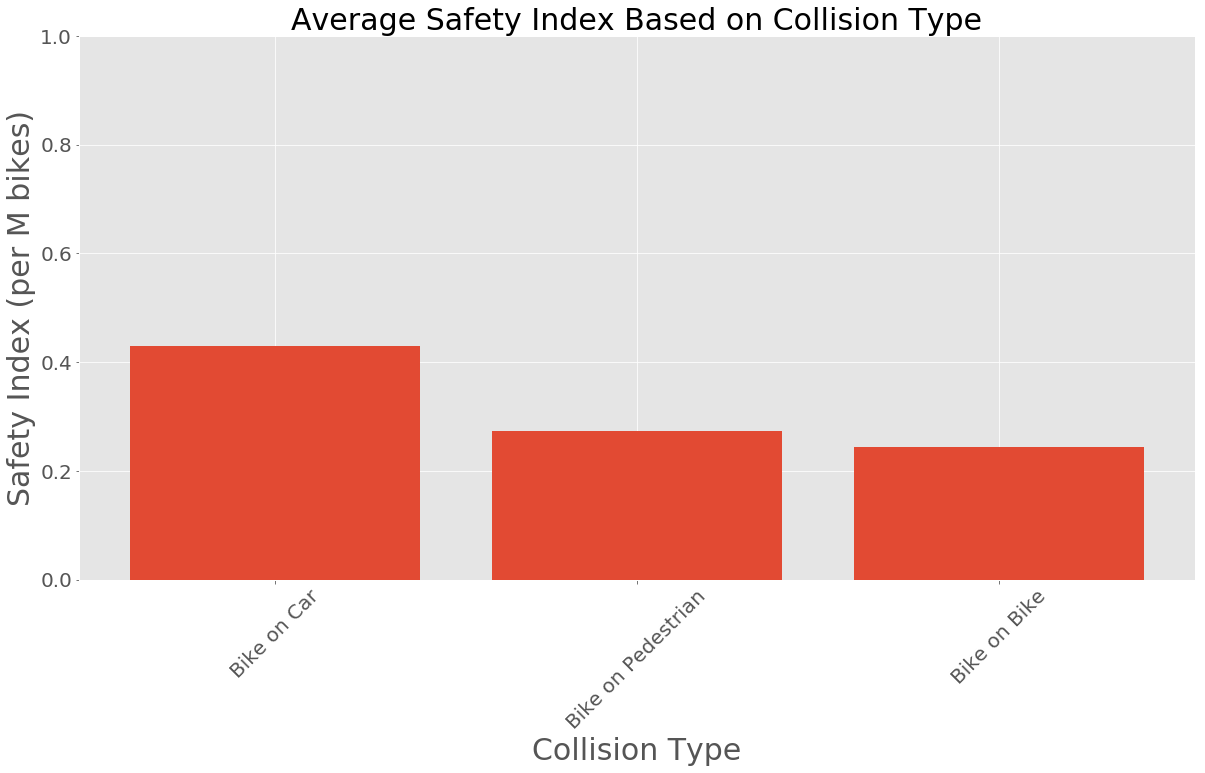

In [68]:
plt.bar(range(3), safety, align='center')
plt.tick_params(axis='y', labelsize=20)
plt.ylim([0,1])
plt.xticks(range(3), ['Bike on Car', 'Bike on Pedestrian', 'Bike on Bike'], fontsize=20 , rotation=45)
plt.title('Average Safety Index Based on Collision Type', size=30)
plt.xlabel('Collision Type', size=30)
plt.ylabel('Safety Index (per M bikes)', size=30)
plt.show()